# Time-Series Forecasting of Carbon Monoxide and Nitrogen Dioxide Levels

Build predictive models to forecast daily or hourly concentrations of **CO(GT)** and **NO₂(GT)** based on historical data.


In [129]:
import pandas as pd
import numpy as np

In [130]:
url = 'https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/refs/heads/main/airquality.csv'
df = pd.read_csv(url)
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,2004-03-10,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,2004-03-10,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,2004-03-10,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,2004-03-10,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [131]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [132]:
df.count()

,0
Date,9357
Time,9357
CO(GT),9357
PT08.S1(CO),9357
NMHC(GT),9357
C6H6(GT),9357
PT08.S2(NMHC),9357
NOx(GT),9357
PT08.S3(NOx),9357
NO2(GT),9357


In [133]:
df.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB


In [134]:
#missimg value handle
df.isnull().sum().sort_values(ascending=False)

,0
Date,0
Time,0
CO(GT),0
PT08.S1(CO),0
NMHC(GT),0
C6H6(GT),0
PT08.S2(NMHC),0
NOx(GT),0
PT08.S3(NOx),0
NO2(GT),0


In [135]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


# Project Workflow

### **Deliverables**:
1. **Forecasting Models**:
   - Trained models for `CO(GT)` and `NO₂(GT)`.
2. **Forecast Visualization**:
   - Plots showing historical trends and future predictions.
3. **Evaluation Report**:
   - Metrics and comparison of different forecasting models.
4. **Insights and Recommendations**:
   - Suggestions for mitigating high levels of these gases based on predictions.


### 1. Data Preprocessing
- **Date-Time Parsing**:
  - Combine the `Date` and `Time` columns into a single `datetime` column.
  - Set the `datetime` column as the index of the dataset.
- **Resampling**:
  - Aggregate the data into meaningful time intervals (e.g., hourly or daily averages).
- **Handle Missing Values**:
  - Use interpolation, mean, or advanced imputation techniques to fill missing data for `CO(GT)` and `NO₂(GT)`.
- **Outlier Detection**:
  - Remove or cap extreme values in `CO(GT)` and `NO₂(GT)` using statistical thresholds.

In [136]:
#replace -200 with NaN
df = df.replace(-200, np.nan)

In [137]:
df.head(20)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-03-10,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-03-10,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-03-10,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-03-10,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
5,2004-03-10,23:00:00,1.2,1197.0,38.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,11.2,59.2,0.7848
6,2004-03-11,0:00:00,1.2,1185.0,31.0,3.6,690.0,62.0,1462.0,77.0,1333.0,733.0,11.3,56.8,0.7603
7,2004-03-11,1:00:00,1.0,1136.0,31.0,3.3,672.0,62.0,1453.0,76.0,1333.0,730.0,10.7,60.0,0.7702
8,2004-03-11,2:00:00,0.9,1094.0,24.0,2.3,609.0,45.0,1579.0,60.0,1276.0,620.0,10.7,59.7,0.7648
9,2004-03-11,3:00:00,0.6,1010.0,19.0,1.7,561.0,NaN,1705.0,NaN,1235.0,501.0,10.3,60.2,0.7517


In [138]:
df.isnull().sum()

,0
Date,0
Time,0
CO(GT),1683
PT08.S1(CO),366
NMHC(GT),8443
C6H6(GT),366
PT08.S2(NMHC),366
NOx(GT),1639
PT08.S3(NOx),366
NO2(GT),1642


In [139]:
#combine Date and Time into datetime

df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

In [140]:
#set datetime as index

df.set_index('datetime', inplace=True)

In [141]:
#drop original Date and Time columns

df.drop(['Date', 'Time'], axis=1, inplace=True)

In [142]:
df.isnull().sum()

,0
CO(GT),1683
PT08.S1(CO),366
NMHC(GT),8443
C6H6(GT),366
PT08.S2(NMHC),366
NOx(GT),1639
PT08.S3(NOx),366
NO2(GT),1642
PT08.S4(NO2),366
PT08.S5(O3),366


In [143]:
#handle missing values
df.interpolate(method='linear', inplace=True)

In [144]:
#resample to daily averages for daily
df_daily = df.resample('D').mean()

In [145]:
#outlier CO(GT) and NO2(GT)
for col in ['CO(GT)', 'NO2(GT)']:
    mean = df_daily[col].mean()
    std = df_daily[col].std()
    df_daily[col] = np.clip(df_daily[col], mean - 3*std, mean + 3*std)
df_daily.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
datetime,,,,,,,,,,,,,
2004-03-10,1.966667,1316.500000,86.500000,8.450000,912.333333,132.0000,1167.333333,108.833333,1545.500000,1096.000000,12.033333,54.900000,0.765633
2004-03-11,2.172917,1244.166667,104.500000,7.979167,851.958333,139.7500,1277.250000,97.666667,1522.833333,885.250000,9.837500,64.075000,0.775767
2004-03-12,2.756250,1281.666667,158.375000,12.129167,1008.291667,171.6875,1101.875000,114.625000,1627.291667,1084.375000,11.287500,51.095833,0.663104
2004-03-13,2.639583,1330.666667,139.250000,10.916667,992.833333,180.7500,993.208333,117.354167,1595.791667,1245.916667,12.866667,51.533333,0.732296
2004-03-14,2.441667,1361.125000,116.958333,9.637500,943.916667,144.6250,1001.291667,109.666667,1602.375000,1234.208333,16.012500,48.850000,0.849671


In [146]:
df.isnull().sum()

,0
CO(GT),0
PT08.S1(CO),0
NMHC(GT),0
C6H6(GT),0
PT08.S2(NMHC),0
NOx(GT),0
PT08.S3(NOx),0
NO2(GT),0
PT08.S4(NO2),0
PT08.S5(O3),0


In [147]:
df_daily.isnull().sum()

,0
CO(GT),0
PT08.S1(CO),0
NMHC(GT),0
C6H6(GT),0
PT08.S2(NMHC),0
NOx(GT),0
PT08.S3(NOx),0
NO2(GT),0
PT08.S4(NO2),0
PT08.S5(O3),0


### 2. Exploratory Data Analysis (EDA)
- **Trend Analysis**:
  - Visualize the long-term trends of `CO(GT)` and `NO₂(GT)`.
- **Seasonality**:
  - Identify seasonal patterns (e.g., daily or yearly fluctuations).
- **Correlation Analysis**:
  - Explore relationships between `CO(GT)`, `NO₂(GT)`, and other features (e.g., temperature or humidity).


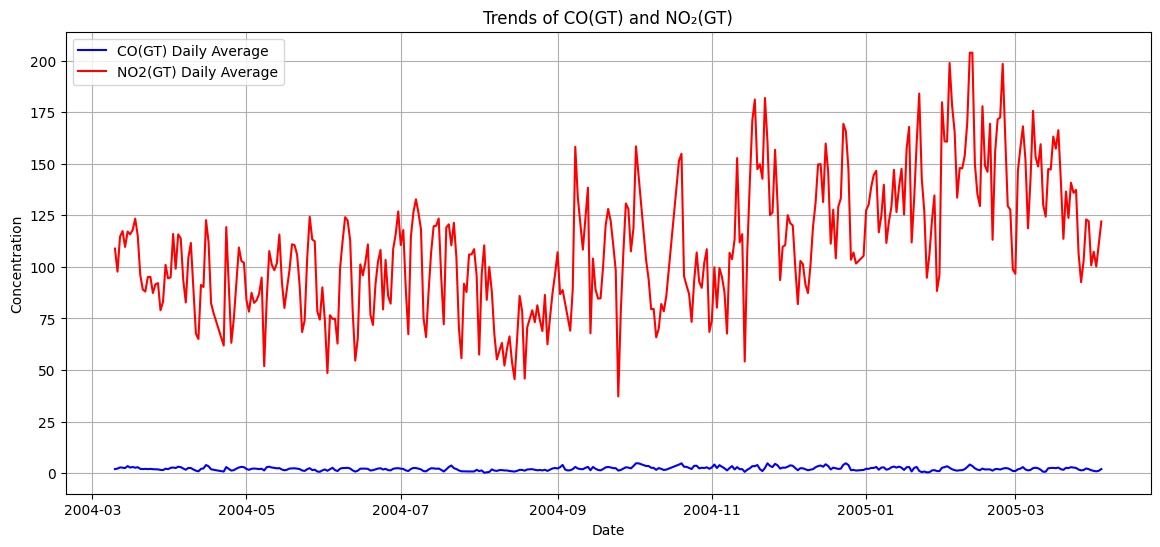

In [148]:
#trend analysis
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(df_daily.index, df_daily['CO(GT)'], label='CO(GT) Daily Average', color='blue')
plt.plot(df_daily.index, df_daily['NO2(GT)'], label='NO2(GT) Daily Average', color='red')
plt.title('Trends of CO(GT) and NO₂(GT)')
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.legend()
plt.grid(True)
plt.show()

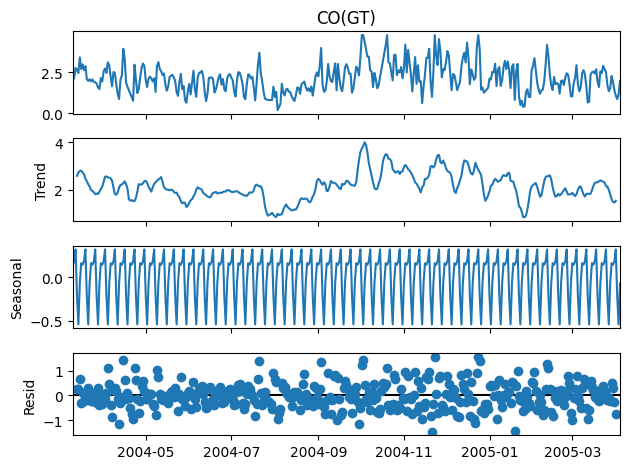

In [149]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Seasonality for CO(GT)
decompose_co = seasonal_decompose(df_daily['CO(GT)'], model='additive', period=7)  # Weekly seasonality
decompose_co.plot()
plt.show()

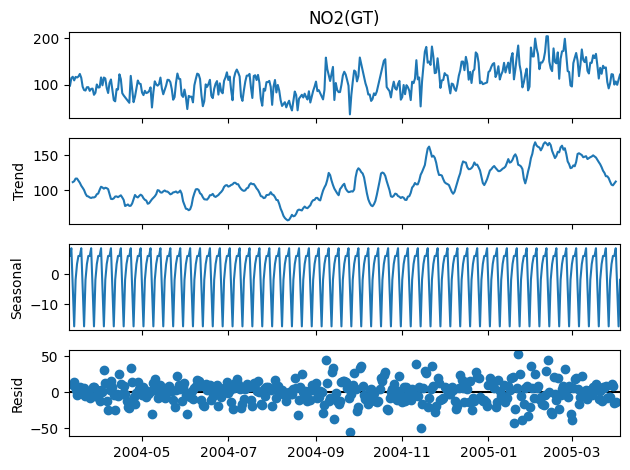

In [150]:
# Seasonality for NO2(GT)
decompose_no2 = seasonal_decompose(df_daily['NO2(GT)'], model='additive', period=7)
decompose_no2.plot()
plt.show()

In [151]:
# Correlation analysis
corr = df_daily.corr()
print(corr[['CO(GT)', 'NO2(GT)']])

                 CO(GT)   NO2(GT)
CO(GT)         1.000000  0.506971
PT08.S1(CO)    0.741128  0.481243
NMHC(GT)       0.186216  0.163800
C6H6(GT)       0.760176  0.373448
PT08.S2(NMHC)  0.752695  0.365217
NOx(GT)        0.727743  0.719345
PT08.S3(NOx)  -0.569128 -0.494314
NO2(GT)        0.506971  1.000000
PT08.S4(NO2)   0.335983 -0.305936
PT08.S5(O3)    0.777856  0.619346
T             -0.127462 -0.520640
RH             0.381347  0.164823
AH             0.069401 -0.496244


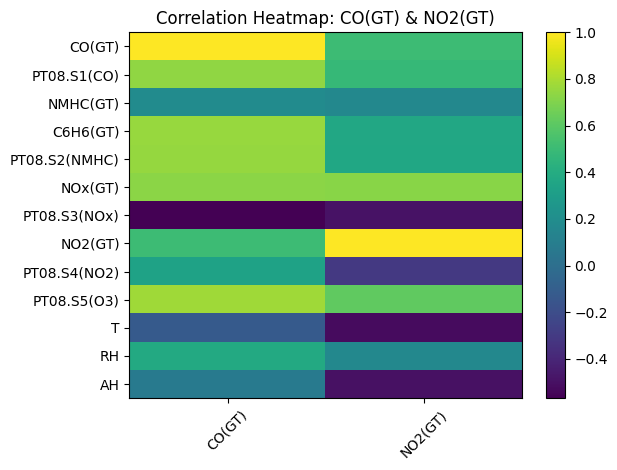

In [152]:
import matplotlib.pyplot as plt
import numpy as np

# Correlation matrix
corr = df_daily.corr()

# Select only required columns
corr_subset = corr[['CO(GT)', 'NO2(GT)']]

plt.figure()
plt.imshow(corr_subset, aspect='auto')
plt.colorbar()

plt.xticks(range(len(corr_subset.columns)), corr_subset.columns, rotation=45)
plt.yticks(range(len(corr_subset.index)), corr_subset.index)

plt.title("Correlation Heatmap: CO(GT) & NO2(GT)")
plt.tight_layout()
plt.show()


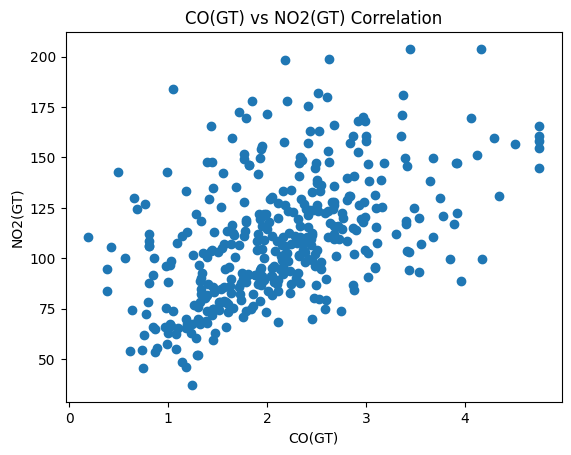

In [153]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(df_daily['CO(GT)'], df_daily['NO2(GT)'])
plt.xlabel('CO(GT)')
plt.ylabel('NO2(GT)')
plt.title('CO(GT) vs NO2(GT) Correlation')
plt.show()


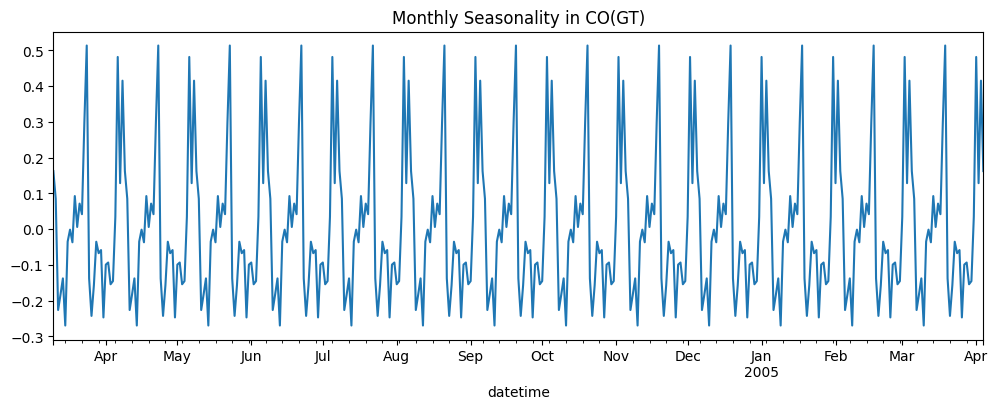

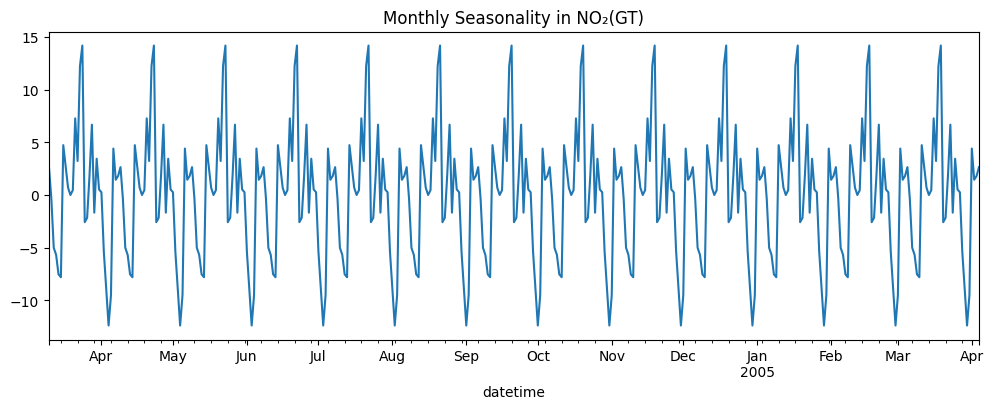

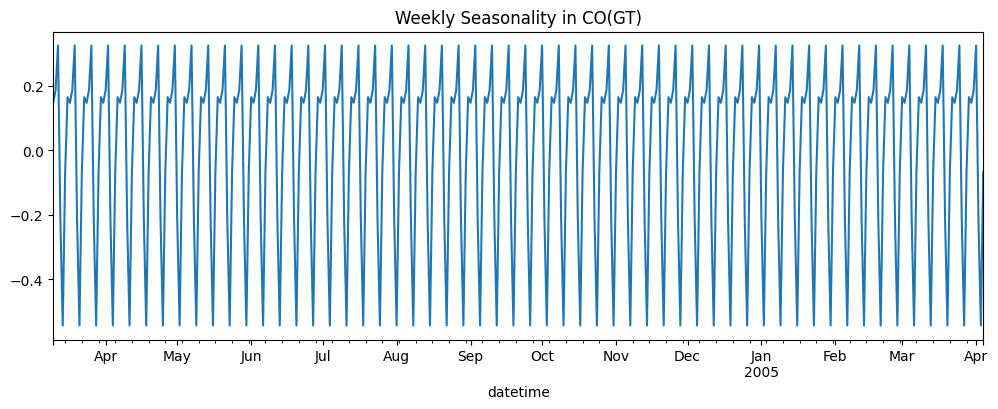

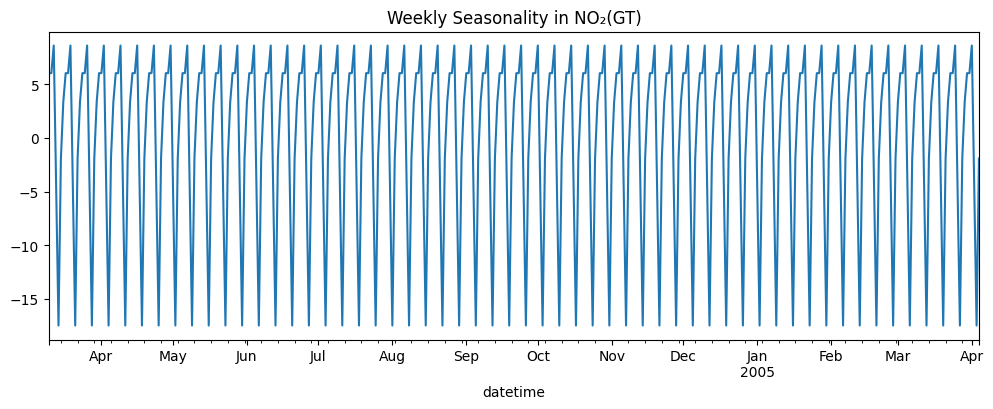

In [154]:
#seasonality

from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

#Monthly seasonality for CO(GT) (period=30 days)
decompose_co_monthly = seasonal_decompose(df_daily['CO(GT)'].dropna(), model='additive', period=30)
decompose_co_monthly.seasonal.plot(figsize=(12,4))
plt.title('Monthly Seasonality in CO(GT)')
plt.show()

#Monthly seasonality for NO2(GT)
decompose_no2_monthly = seasonal_decompose(df_daily['NO2(GT)'].dropna(), model='additive', period=30)
decompose_no2_monthly.seasonal.plot(figsize=(12,4))
plt.title('Monthly Seasonality in NO₂(GT)')
plt.show()

#Weekly seasonality for CO(GT) (period=7 days)
decompose_co_weekly = seasonal_decompose(df_daily['CO(GT)'].dropna(), model='additive', period=7)
decompose_co_weekly.seasonal.plot(figsize=(12,4))
plt.title('Weekly Seasonality in CO(GT)')
plt.show()

#Weekly seasonality for NO2(GT)
decompose_no2_weekly = seasonal_decompose(df_daily['NO2(GT)'].dropna(), model='additive', period=7)
decompose_no2_weekly.seasonal.plot(figsize=(12,4))
plt.title('Weekly Seasonality in NO₂(GT)')
plt.show()

Correlation with CO(GT) and NO₂(GT):
                CO(GT)   NO2(GT)
CO(GT)        1.000000  0.506971
NO2(GT)       0.506971  1.000000
T            -0.127462 -0.520640
RH            0.381347  0.164823
AH            0.069401 -0.496244
PT08.S1(CO)   0.741128  0.481243
PT08.S3(NOx) -0.569128 -0.494314


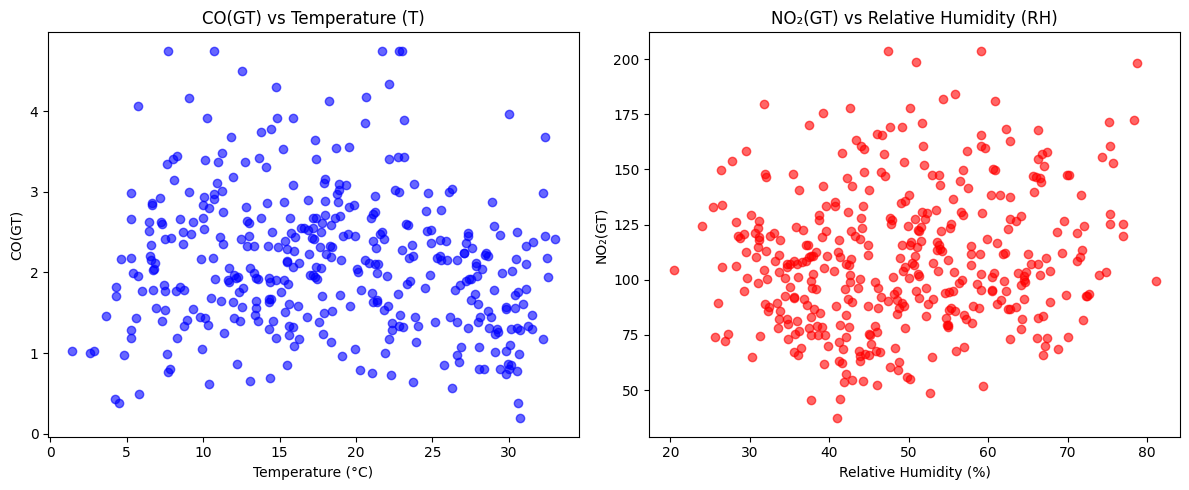

In [155]:
# Correlation matrix focusing on CO and NO2
corr = df_daily[['CO(GT)', 'NO2(GT)', 'T', 'RH', 'AH', 'PT08.S1(CO)', 'PT08.S3(NOx)']].corr()
print("Correlation with CO(GT) and NO₂(GT):")
print(corr[['CO(GT)', 'NO2(GT)']])

# Scatter plots for key relationships (e.g., with Temperature and Humidity)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(df_daily['T'], df_daily['CO(GT)'], alpha=0.6, color='blue')
plt.title('CO(GT) vs Temperature (T)')
plt.xlabel('Temperature (°C)')
plt.ylabel('CO(GT)')

plt.subplot(1, 2, 2)
plt.scatter(df_daily['RH'], df_daily['NO2(GT)'], alpha=0.6, color='red')
plt.title('NO₂(GT) vs Relative Humidity (RH)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('NO₂(GT)')

plt.tight_layout()
plt.show()


### 3. Feature Engineering
- Create lag features for `CO(GT)` and `NO₂(GT)` to incorporate historical values.
- Add time-based features (e.g., hour of the day, day of the week, month).
- Include environmental factors (`T`, `RH`, `AH`) as predictors.


In [156]:
#Lag features for CO(GT) and NO₂(GT) weekly pattern
lag_days = [1, 2, 7]
for lag in lag_days:
    df_daily[f'CO(GT)_lag_{lag}'] = df_daily['CO(GT)'].shift(lag)
    df_daily[f'NO2(GT)_lag_{lag}'] = df_daily['NO2(GT)'].shift(lag)

In [157]:
#time based features
df_daily['day_of_week'] = df_daily.index.day_of_week
df_daily['month'] = df_daily.index.month
df_daily['quarter'] = df_daily.index.quarter
df_daily['is_weekend'] = (df_daily['day_of_week'] >= 5).astype(int)

In [158]:
df_daily

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),...,CO(GT)_lag_1,NO2(GT)_lag_1,CO(GT)_lag_2,NO2(GT)_lag_2,CO(GT)_lag_7,NO2(GT)_lag_7,day_of_week,month,quarter,is_weekend
datetime,,,,,,,,,,,,,,,,,,,,,
2004-03-10,1.966667,1316.500000,86.500000,8.450000,912.333333,132.000000,1167.333333,108.833333,1545.500000,1096.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,2,3,1,0
2004-03-11,2.172917,1244.166667,104.500000,7.979167,851.958333,139.750000,1277.250000,97.666667,1522.833333,885.250000,...,1.966667,108.833333,NaN,NaN,NaN,NaN,3,3,1,0
2004-03-12,2.756250,1281.666667,158.375000,12.129167,1008.291667,171.687500,1101.875000,114.625000,1627.291667,1084.375000,...,2.172917,97.666667,1.966667,108.833333,NaN,NaN,4,3,1,0
2004-03-13,2.639583,1330.666667,139.250000,10.916667,992.833333,180.750000,993.208333,117.354167,1595.791667,1245.916667,...,2.756250,114.625000,2.172917,97.666667,NaN,NaN,5,3,1,1
2004-03-14,2.441667,1361.125000,116.958333,9.637500,943.916667,144.625000,1001.291667,109.666667,1602.375000,1234.208333,...,2.639583,117.354167,2.756250,114.625000,NaN,NaN,6,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-03-31,1.387500,1008.125000,275.000000,5.220833,749.416667,185.083333,795.666667,100.708333,1176.541667,763.833333,...,1.916667,122.125000,2.262500,123.000000,2.675000,135.875000,3,3,1,0
2005-04-01,1.083333,903.291667,275.000000,3.412500,663.000000,161.833333,946.875000,107.333333,943.250000,523.958333,...,1.387500,100.708333,1.916667,122.125000,2.504167,137.291667,4,4,2,0
2005-04-02,0.854167,890.958333,275.000000,2.529167,616.291667,142.375000,991.750000,100.166667,864.333333,481.750000,...,1.083333,107.333333,1.387500,100.708333,1.716667,106.541667,5,4,2,1


In [159]:
#lag features will return NaN rows drop them
df_daily.dropna(inplace=True)

In [160]:
df_daily

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),...,CO(GT)_lag_1,NO2(GT)_lag_1,CO(GT)_lag_2,NO2(GT)_lag_2,CO(GT)_lag_7,NO2(GT)_lag_7,day_of_week,month,quarter,is_weekend
datetime,,,,,,,,,,,,,,,,,,,,,
2004-03-17,2.970833,1362.833333,207.458333,15.237500,1099.083333,194.208333,930.666667,117.854167,1741.208333,1405.875000,...,2.681250,115.750000,3.402083,117.104167,1.966667,108.833333,2,3,1,0
2004-03-18,2.614583,1352.666667,346.663835,13.795833,1072.583333,171.687500,901.166667,123.375000,1702.833333,1301.000000,...,2.970833,117.854167,2.681250,115.750000,2.172917,97.666667,3,3,1,0
2004-03-19,2.866667,1304.291667,491.849515,13.520833,1058.000000,174.000000,913.375000,115.145833,1745.416667,1095.791667,...,2.614583,123.375000,2.970833,117.854167,2.756250,114.625000,4,3,1,0
2004-03-20,2.068750,1288.625000,479.033981,8.754167,911.958333,128.916667,968.458333,96.083333,1609.083333,1019.000000,...,2.866667,115.145833,2.614583,123.375000,2.639583,117.354167,5,3,1,1
2004-03-21,1.964583,1252.708333,466.218447,7.595833,870.625000,115.583333,975.666667,89.020833,1601.791667,954.250000,...,2.068750,96.083333,2.866667,115.145833,2.441667,109.666667,6,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-03-31,1.387500,1008.125000,275.000000,5.220833,749.416667,185.083333,795.666667,100.708333,1176.541667,763.833333,...,1.916667,122.125000,2.262500,123.000000,2.675000,135.875000,3,3,1,0
2005-04-01,1.083333,903.291667,275.000000,3.412500,663.000000,161.833333,946.875000,107.333333,943.250000,523.958333,...,1.387500,100.708333,1.916667,122.125000,2.504167,137.291667,4,4,2,0
2005-04-02,0.854167,890.958333,275.000000,2.529167,616.291667,142.375000,991.750000,100.166667,864.333333,481.750000,...,1.083333,107.333333,1.387500,100.708333,1.716667,106.541667,5,4,2,1


In [161]:


# চেক করি নতুন ফিচারগুলো ঠিকমতো যোগ হয়েছে কিনা
print("New shape after feature engineering:", df_daily.shape)
print("\nNew columns added:")
print([col for col in df_daily.columns if col not in ['CO(GT)', 'NO2(GT)', 'PT08.S1(CO)', 'NMHC(GT)',
                                                    'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)',
                                                    'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']])

df_daily[['CO(GT)', 'CO(GT)_lag_1', 'CO(GT)_lag_2', 'CO(GT)_lag_7',
          'NO2(GT)', 'NO2(GT)_lag_1', 'day_of_week', 'month', 'is_weekend', 'T', 'RH', 'AH']].head(10)

New shape after feature engineering: (384, 23)

New columns added:
['CO(GT)_lag_1', 'NO2(GT)_lag_1', 'CO(GT)_lag_2', 'NO2(GT)_lag_2', 'CO(GT)_lag_7', 'NO2(GT)_lag_7', 'day_of_week', 'month', 'quarter', 'is_weekend']


,CO(GT),CO(GT)_lag_1,CO(GT)_lag_2,CO(GT)_lag_7,NO2(GT),NO2(GT)_lag_1,day_of_week,month,is_weekend,T,RH,AH
datetime,,,,,,,,,,,,
2004-03-17,2.970833,2.681250,3.402083,1.966667,117.854167,115.750000,2,3,0,18.779167,41.166667,0.804917
2004-03-18,2.614583,2.970833,2.681250,2.172917,123.375000,117.854167,3,3,0,17.762500,44.087500,0.826017
2004-03-19,2.866667,2.614583,2.970833,2.756250,115.145833,123.375000,4,3,0,14.191667,57.904167,0.923958
2004-03-20,2.068750,2.866667,2.614583,2.639583,96.083333,115.145833,5,3,1,15.862500,52.183333,0.928996
2004-03-21,1.964583,2.068750,2.866667,2.441667,89.020833,96.083333,6,3,1,17.212500,52.454167,1.006321
2004-03-22,2.064583,1.964583,2.068750,3.402083,88.000000,89.020833,0,3,0,17.358333,44.833333,0.857933
2004-03-23,1.937500,2.064583,1.964583,2.681250,95.062500,88.000000,1,3,0,12.133333,60.466667,0.842500
2004-03-24,2.052083,1.937500,2.064583,2.970833,95.145833,95.062500,2,3,0,11.675000,59.087500,0.796708
2004-03-25,1.904167,2.052083,1.937500,2.614583,87.291667,95.145833,3,3,0,11.633333,58.795833,0.782079


### 4. Time-Series Forecasting
- Train separate models for **CO(GT)** and **NO₂(GT)**.
- Explore the following forecasting approaches:
  - **Statistical Models**:
    - Classical models like ARIMA or SARIMA for univariate forecasting.
  - **Machine Learning Models**:
    - Use regression models trained on lag features and external predictors.
  - **Deep Learning Models**:
    - Apply LSTM, GRU, or other RNN-based models for sequence forecasting.
- Evaluate and compare the models.


In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor

In [168]:
#univariate ARIMA forecasting
co_series = df_daily['CO(GT)'].asfreq('D')
no2_series = df_daily['NO2(GT)'].asfreq('D')

#train-test split
test_horizon = 30
co_train, co_test = co_series[:-test_horizon], co_series[-test_horizon:]
no2_train, no2_test = no2_series[:-test_horizon], no2_series[-test_horizon:]

def fit_forecast_arima(train_series, test_len, order=(2,1,2)):
    model = ARIMA(train_series, order=order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=test_len)
    return forecast, model_fit

#ARIMA for CO
co_pred_arima, co_model = fit_forecast_arima(co_train, len(co_test), order=(2,1,2))

#ARIMA for NO2
no2_pred_arima, no2_model = fit_forecast_arima(no2_train, len(no2_test), order=(2,1,2))

#evaluation
def eval_forecast(true, pred, label="Model"):
    mae = mean_absolute_error(true, pred)
    rmse = sqrt(mean_squared_error(true, pred))
    print(f"{label} -> MAE: {mae:.4f}, RMSE: {rmse:.4f}")
    return mae, rmse

print("ARIMA Results....")
co_mae_arima, co_rmse_arima = eval_forecast(co_test, co_pred_arima, "ARIMA CO(GT)")
no2_mae_arima, no2_rmse_arima = eval_forecast(no2_test, no2_pred_arima, "ARIMA NO2(GT)")

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA Results....
ARIMA CO(GT) -> MAE: 0.5465, RMSE: 0.6321
ARIMA NO2(GT) -> MAE: 21.8797, RMSE: 26.7263


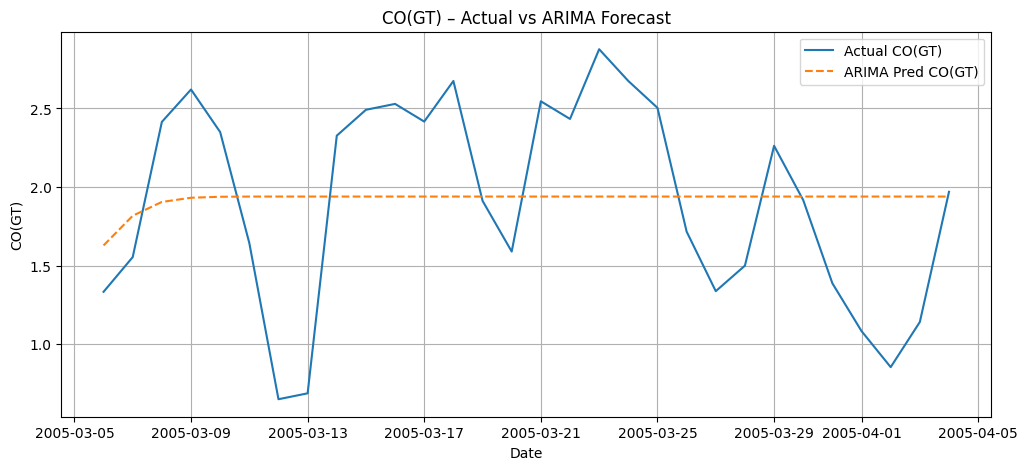

In [169]:
#ARIMA Actual vs Predicted for CO(GT)

plt.figure(figsize=(12,5))
plt.plot(co_test.index, co_test, label='Actual CO(GT)')
plt.plot(co_test.index, co_pred_arima, label='ARIMA Pred CO(GT)', linestyle='--')
plt.title('CO(GT) – Actual vs ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('CO(GT)')
plt.legend()
plt.grid(True)
plt.show()

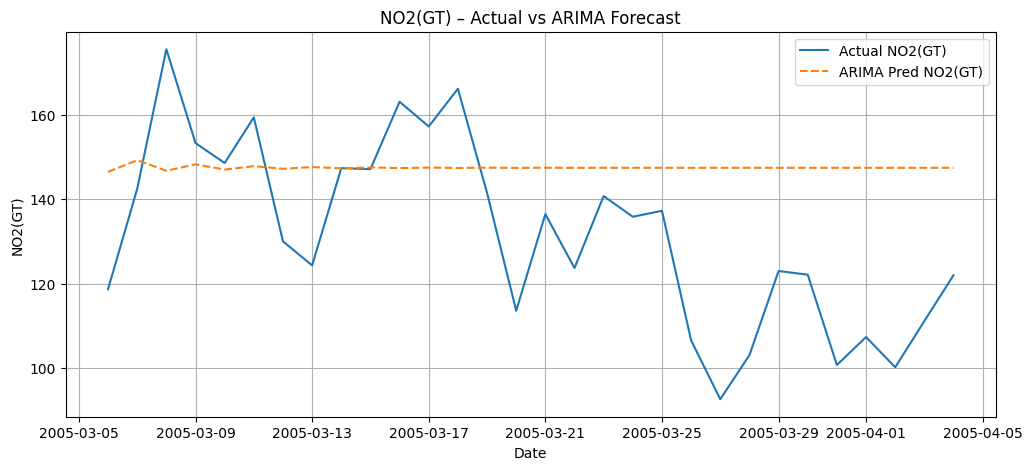

In [170]:
#ARIMA Actual vs Predicted for NO2(GT)

plt.figure(figsize=(12,5))
plt.plot(no2_test.index, no2_test, label='Actual NO2(GT)')
plt.plot(no2_test.index, no2_pred_arima, label='ARIMA Pred NO2(GT)', linestyle='--')
plt.title('NO2(GT) – Actual vs ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('NO2(GT)')
plt.legend()
plt.grid(True)
plt.show()

In [171]:
#ml model regression (Random Forest with lag + time + env)

feature_cols = [
    'CO(GT)_lag_1', 'CO(GT)_lag_2', 'CO(GT)_lag_7',
    'NO2(GT)_lag_1', 'NO2(GT)_lag_2', 'NO2(GT)_lag_7',
    'day_of_week', 'month', 'quarter', 'is_weekend',
    'T', 'RH', 'AH']

#Target CO
X = df_daily[feature_cols].copy()
y_co = df_daily['CO(GT)']
y_no2 = df_daily['NO2(GT)']

#Train-test split
split_index = len(df_daily) - test_horizon

X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_co_train, y_co_test = y_co.iloc[:split_index], y_co.iloc[split_index:]
y_no2_train, y_no2_test = y_no2.iloc[:split_index], y_no2.iloc[split_index:]

#RandomForest for CO
rf_co = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    n_jobs=-1)
rf_co.fit(X_train, y_co_train)
co_pred_rf = rf_co.predict(X_test)

#RandomForest for NO2
rf_no2 = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    n_jobs=-1)
rf_no2.fit(X_train, y_no2_train)
no2_pred_rf = rf_no2.predict(X_test)

print("\n Random Forest Results....")
co_mae_rf, co_rmse_rf = eval_forecast(y_co_test, co_pred_rf, "RF CO(GT)")
no2_mae_rf, no2_rmse_rf = eval_forecast(y_no2_test, no2_pred_rf, "RF NO2(GT)")


 Random Forest Results....
RF CO(GT) -> MAE: 0.4252, RMSE: 0.5234
RF NO2(GT) -> MAE: 12.7727, RMSE: 14.8678


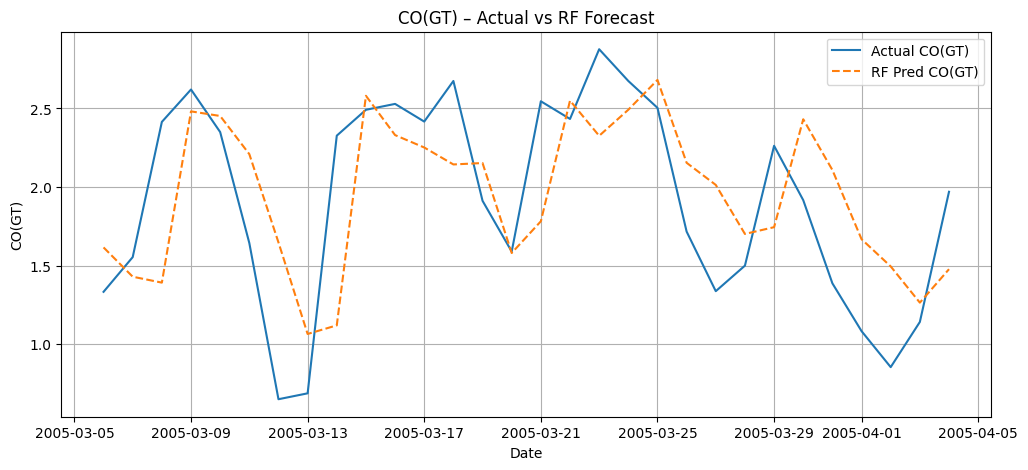

In [172]:
#Actual vs Predicted (RF – CO)
plt.figure(figsize=(12,5))
plt.plot(y_co_test.index, y_co_test, label='Actual CO(GT)')
plt.plot(y_co_test.index, co_pred_rf, label='RF Pred CO(GT)', linestyle='--')
plt.title('CO(GT) – Actual vs RF Forecast')
plt.xlabel('Date')
plt.ylabel('CO(GT)')
plt.legend()
plt.grid(True)
plt.show()

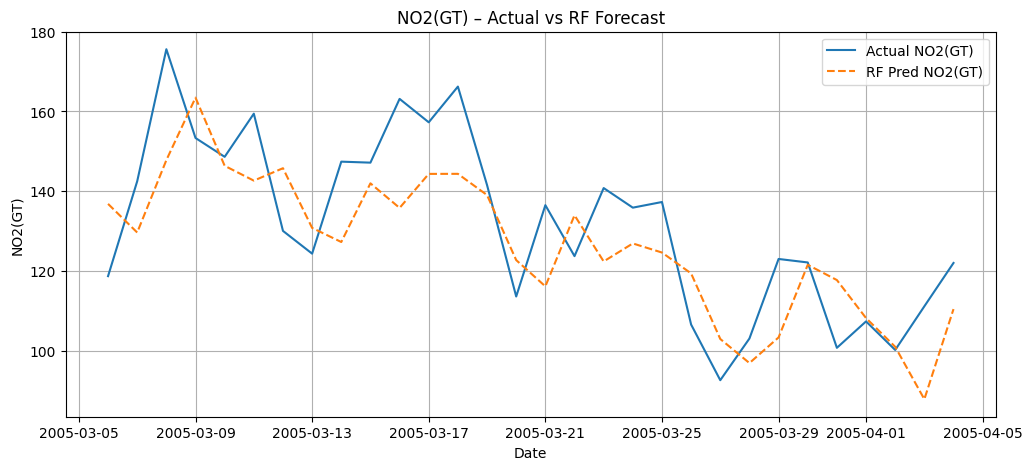

In [173]:
#Actual vs Predicted (RF – NO2)
plt.figure(figsize=(12,5))
plt.plot(y_no2_test.index, y_no2_test, label='Actual NO2(GT)')
plt.plot(y_no2_test.index, no2_pred_rf, label='RF Pred NO2(GT)', linestyle='--')
plt.title('NO2(GT) – Actual vs RF Forecast')
plt.xlabel('Date')
plt.ylabel('NO2(GT)')
plt.legend()
plt.grid(True)
plt.show()

In [178]:
print("\n\nMODEL PERFORMANCE SUMMARY (LAST 30 DAYS):")
print(f"CO(GT)  – ARIMA: MAE={co_mae_arima:.3f}, RMSE={co_rmse_arima:.3f}")
print(f"CO(GT)  – RF   : MAE={co_mae_rf:.3f}, RMSE={co_rmse_rf:.3f}")
print(f"NO2(GT) – ARIMA: MAE={no2_mae_arima:.3f}, RMSE={no2_rmse_arima:.3f}")
print(f"NO2(GT) – RF   : MAE={no2_mae_rf:.3f}, RMSE={no2_rmse_rf:.3f}")



MODEL PERFORMANCE SUMMARY (LAST 30 DAYS):
CO(GT)  – ARIMA: MAE=0.546, RMSE=0.632
CO(GT)  – RF   : MAE=0.425, RMSE=0.523
NO2(GT) – ARIMA: MAE=21.880, RMSE=26.726
NO2(GT) – RF   : MAE=12.773, RMSE=14.868


In [182]:
#DL(LSTM)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

# --- Helper: sequence bananor function (sliding window) ---
def create_sequences(data, target_col, window_size=14):
    X_seq, y_seq = [], []
    values = data.values
    target_idx = data.columns.get_loc(target_col)

    for i in range(window_size, len(data)):
        X_seq.append(values[i-window_size:i, :])  # sob feature
        y_seq.append(values[i, target_idx])       # sudhu target
    return np.array(X_seq), np.array(y_seq)

# LSTM er jonno: scaling (0-1)
scaler_co = MinMaxScaler()
scaler_no2 = MinMaxScaler()

# CO(GT) er jonno feature set: age defined feature_cols + target keo include korbo scaling er jonno
co_data_for_lstm = df_daily[feature_cols + ['CO(GT)']].copy()
no2_data_for_lstm = df_daily[feature_cols + ['NO2(GT)']].copy()

co_scaled = scaler_co.fit_transform(co_data_for_lstm)
no2_scaled = scaler_no2.fit_transform(no2_data_for_lstm)

co_scaled_df = pd.DataFrame(co_scaled, index=df_daily.index, columns=co_data_for_lstm.columns)
no2_scaled_df = pd.DataFrame(no2_scaled, index=df_daily.index, columns=no2_data_for_lstm.columns)

window_size = 14  # 2 week history

# CO sequences
X_co_seq, y_co_seq = create_sequences(co_scaled_df, target_col='CO(GT)', window_size=window_size)
# NO2 sequences
X_no2_seq, y_no2_seq = create_sequences(no2_scaled_df, target_col='NO2(GT)', window_size=window_size)

# Same time-based split (last test_horizon din)
split_index_seq = len(df_daily) - test_horizon - window_size

X_co_train, X_co_test = X_co_seq[:split_index_seq], X_co_seq[split_index_seq:]
y_co_train_lstm, y_co_test_lstm = y_co_seq[:split_index_seq], y_co_seq[split_index_seq:]

X_no2_train, X_no2_test = X_no2_seq[:split_index_seq], X_no2_seq[split_index_seq:]
y_no2_train_lstm, y_no2_test_lstm = y_no2_seq[:split_index_seq], y_no2_seq[split_index_seq:]

# --- LSTM model define korar helper ---
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(64, activation='tanh', return_sequences=False, input_shape=input_shape))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# LSTM for CO(GT)
lstm_co = build_lstm_model(input_shape=(X_co_train.shape[1], X_co_train.shape[2]))
history_co = lstm_co.fit(
    X_co_train, y_co_train_lstm,
    validation_split=0.1,
    epochs=50,
    batch_size=16,
    callbacks=[early_stop],
    verbose=0
)

y_co_pred_lstm_scaled = lstm_co.predict(X_co_test)
# back-transform only target
# scaler inverse ke sudhu target column er jonno apply korar easy trick:
co_dummy = np.zeros((len(y_co_pred_lstm_scaled), co_scaled_df.shape[1]))
target_idx_co = co_scaled_df.columns.get_loc('CO(GT)')
co_dummy[:, target_idx_co] = y_co_pred_lstm_scaled.flatten()
y_co_pred_lstm = scaler_co.inverse_transform(co_dummy)[:, target_idx_co]

co_dummy_true = np.zeros((len(y_co_test_lstm), co_scaled_df.shape[1]))
co_dummy_true[:, target_idx_co] = y_co_test_lstm
y_co_test_inv = scaler_co.inverse_transform(co_dummy_true)[:, target_idx_co]

co_mae_lstm = mean_absolute_error(y_co_test_inv, y_co_pred_lstm)
co_rmse_lstm = sqrt(mean_squared_error(y_co_test_inv, y_co_pred_lstm))

print("\n=== LSTM Results (CO) ===")
print(f"LSTM CO(GT) -> MAE: {co_mae_lstm:.4f}, RMSE: {co_rmse_lstm:.4f}")

# LSTM for NO2(GT)
lstm_no2 = build_lstm_model(input_shape=(X_no2_train.shape[1], X_no2_train.shape[2]))
history_no2 = lstm_no2.fit(
    X_no2_train, y_no2_train_lstm,
    validation_split=0.1,
    epochs=50,
    batch_size=16,
    callbacks=[early_stop],
    verbose=0
)

y_no2_pred_lstm_scaled = lstm_no2.predict(X_no2_test)

no2_dummy = np.zeros((len(y_no2_pred_lstm_scaled), no2_scaled_df.shape[1]))
target_idx_no2 = no2_scaled_df.columns.get_loc('NO2(GT)')
no2_dummy[:, target_idx_no2] = y_no2_pred_lstm_scaled.flatten()
y_no2_pred_lstm = scaler_no2.inverse_transform(no2_dummy)[:, target_idx_no2]

no2_dummy_true = np.zeros((len(y_no2_test_lstm), no2_scaled_df.shape[1]))
no2_dummy_true[:, target_idx_no2] = y_no2_test_lstm
y_no2_test_inv = scaler_no2.inverse_transform(no2_dummy_true)[:, target_idx_no2]

no2_mae_lstm = mean_absolute_error(y_no2_test_inv, y_no2_pred_lstm)
no2_rmse_lstm = sqrt(mean_squared_error(y_no2_test_inv, y_no2_pred_lstm))

print("\n LSTM Results (NO2)...")
print(f"LSTM NO2(GT) -> MAE: {no2_mae_lstm:.4f}, RMSE: {no2_rmse_lstm:.4f}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step

=== LSTM Results (CO) ===
LSTM CO(GT) -> MAE: 0.5752, RMSE: 0.6480


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step

 LSTM Results (NO2)...
LSTM NO2(GT) -> MAE: 14.1309, RMSE: 16.7639


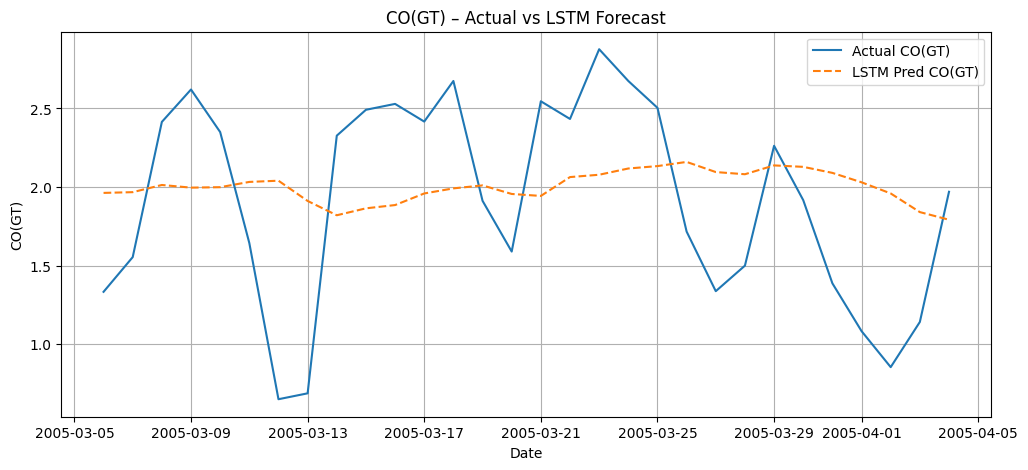

In [183]:
# Plot: LSTM CO(GT)
plt.figure(figsize=(12,5))
plt.plot(df_daily.index[-test_horizon:], y_co_test_inv[-test_horizon:], label='Actual CO(GT)')
plt.plot(df_daily.index[-test_horizon:], y_co_pred_lstm[-test_horizon:], label='LSTM Pred CO(GT)', linestyle='--')
plt.title('CO(GT) – Actual vs LSTM Forecast')
plt.xlabel('Date')
plt.ylabel('CO(GT)')
plt.legend()
plt.grid(True)
plt.show()

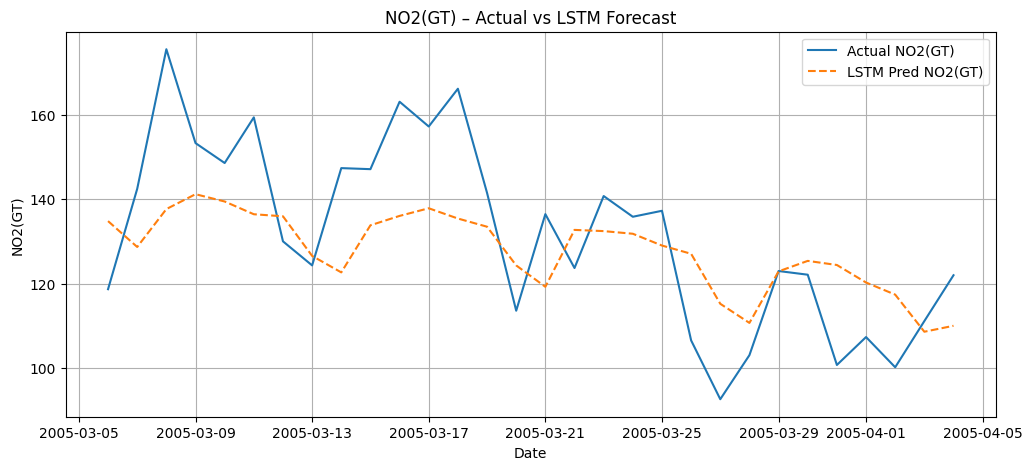

In [184]:
# Plot: LSTM NO2(GT)
plt.figure(figsize=(12,5))
plt.plot(df_daily.index[-test_horizon:], y_no2_test_inv[-test_horizon:], label='Actual NO2(GT)')
plt.plot(df_daily.index[-test_horizon:], y_no2_pred_lstm[-test_horizon:], label='LSTM Pred NO2(GT)', linestyle='--')
plt.title('NO2(GT) – Actual vs LSTM Forecast')
plt.xlabel('Date')
plt.ylabel('NO2(GT)')
plt.legend()
plt.grid(True)
plt.show()

### 5. Model Evaluation
- Use appropriate metrics for forecasting:
  - Mean Absolute Error (MAE)
  - Root Mean Squared Error (RMSE)
  - Mean Absolute Percentage Error (MAPE)
- Plot actual vs. predicted values to visualize performance.


In [190]:
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_absolute_error, mean_squared_error

#Extra metric: MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    eps = 1e-8
    return np.mean(np.abs((y_true - y_pred) / np.clip(np.abs(y_true), eps, None))) * 100

# ARIMA – CO
co_mae_arima = mean_absolute_error(co_test, co_pred_arima)
co_rmse_arima = sqrt(mean_squared_error(co_test, co_pred_arima))
co_mape_arima = mean_absolute_percentage_error(co_test, co_pred_arima)

# ARIMA – NO2
no2_mae_arima = mean_absolute_error(no2_test, no2_pred_arima)
no2_rmse_arima = sqrt(mean_squared_error(no2_test, no2_pred_arima))
no2_mape_arima = mean_absolute_percentage_error(no2_test, no2_pred_arima)

# RF – CO
co_mae_rf = mean_absolute_error(y_co_test, co_pred_rf)
co_rmse_rf = sqrt(mean_squared_error(y_co_test, co_pred_rf))
co_mape_rf = mean_absolute_percentage_error(y_co_test, co_pred_rf)

# RF – NO2
no2_mae_rf = mean_absolute_error(y_no2_test, no2_pred_rf)
no2_rmse_rf = sqrt(mean_squared_error(y_no2_test, no2_pred_rf))
no2_mape_rf = mean_absolute_percentage_error(y_no2_test, no2_pred_rf)

# OPTIONAL: LSTM jodi add kora thake
use_lstm = 'y_co_test_inv' in globals()

if use_lstm:
    co_mae_lstm = mean_absolute_error(y_co_test_inv, y_co_pred_lstm)
    co_rmse_lstm = sqrt(mean_squared_error(y_co_test_inv, y_co_pred_lstm))
    co_mape_lstm = mean_absolute_percentage_error(y_co_test_inv, y_co_pred_lstm)

    no2_mae_lstm = mean_absolute_error(y_no2_test_inv, y_no2_pred_lstm)
    no2_rmse_lstm = sqrt(mean_squared_error(y_no2_test_inv, y_no2_pred_lstm))
    no2_mape_lstm = mean_absolute_percentage_error(y_no2_test_inv, y_no2_pred_lstm)

In [191]:
#metric summary
print("MODEL EVALUATION (CO)...")
print(f"ARIMA CO(GT) -> MAE: {co_mae_arima:.4f}, RMSE: {co_rmse_arima:.4f}, MAPE: {co_mape_arima:.2f}%")
print(f"RF    CO(GT) -> MAE: {co_mae_rf:.4f}, RMSE: {co_rmse_rf:.4f}, MAPE: {co_mape_rf:.2f}%")
if use_lstm:
    print(f"LSTM  CO(GT) -> MAE: {co_mae_lstm:.4f}, RMSE: {co_rmse_lstm:.4f}, MAPE: {co_mape_lstm:.2f}%")

MODEL EVALUATION (CO)...
ARIMA CO(GT) -> MAE: 0.5465, RMSE: 0.6321, MAPE: 39.40%
RF    CO(GT) -> MAE: 0.4252, RMSE: 0.5234, MAPE: 28.37%
LSTM  CO(GT) -> MAE: 0.5752, RMSE: 0.6480, MAPE: 42.25%


In [192]:
#metric summary
print("\nMODEL EVALUATION (NO2)...")
print(f"ARIMA NO2(GT) -> MAE: {no2_mae_arima:.4f}, RMSE: {no2_rmse_arima:.4f}, MAPE: {no2_mape_arima:.2f}%")
print(f"RF    NO2(GT) -> MAE: {no2_mae_rf:.4f}, RMSE: {no2_rmse_rf:.4f}, MAPE: {no2_mape_rf:.2f}%")
if use_lstm:
    print(f"LSTM  NO2(GT) -> MAE: {no2_mae_lstm:.4f}, RMSE: {no2_rmse_lstm:.4f}, MAPE: {no2_mape_lstm:.2f}%")


MODEL EVALUATION (NO2)...
ARIMA NO2(GT) -> MAE: 21.8797, RMSE: 26.7263, MAPE: 18.80%
RF    NO2(GT) -> MAE: 12.7727, RMSE: 14.8678, MAPE: 9.60%
LSTM  NO2(GT) -> MAE: 14.1309, RMSE: 16.7639, MAPE: 10.73%


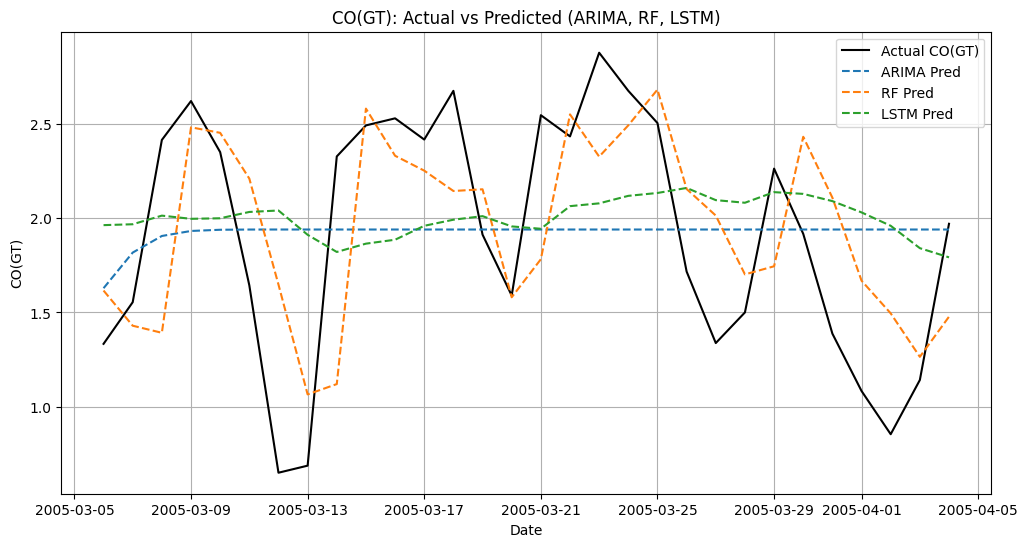

In [193]:
#actual vs predict plots all models
plt.figure(figsize=(12,6))
plt.plot(co_test.index, co_test, label='Actual CO(GT)', color='black')
plt.plot(co_test.index, co_pred_arima, label='ARIMA Pred', linestyle='--')
plt.plot(y_co_test.index, co_pred_rf, label='RF Pred', linestyle='--')
if use_lstm:
    plt.plot(df_daily.index[-test_horizon:], y_co_pred_lstm[-test_horizon:], label='LSTM Pred', linestyle='--')
plt.title('CO(GT): Actual vs Predicted (ARIMA, RF, LSTM)')
plt.xlabel('Date')
plt.ylabel('CO(GT)')
plt.legend()
plt.grid(True)
plt.show()

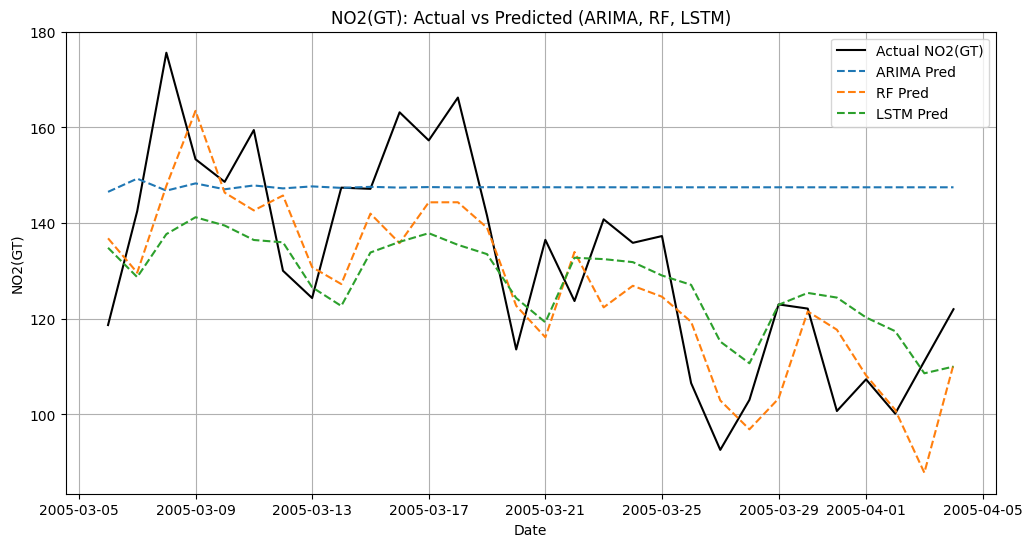

In [195]:
# NO2(GT) ARIMA vs RF vs LSTM
plt.figure(figsize=(12,6))
plt.plot(no2_test.index, no2_test, label='Actual NO2(GT)', color='black')
plt.plot(no2_test.index, no2_pred_arima, label='ARIMA Pred', linestyle='--')
plt.plot(y_no2_test.index, no2_pred_rf, label='RF Pred', linestyle='--')
if use_lstm:
    plt.plot(df_daily.index[-test_horizon:], y_no2_pred_lstm[-test_horizon:], label='LSTM Pred', linestyle='--')
plt.title('NO2(GT): Actual vs Predicted (ARIMA, RF, LSTM)')
plt.xlabel('Date')
plt.ylabel('NO2(GT)')
plt.legend()
plt.grid(True)
plt.show()

### 6. Visualization and Insights
- Generate forecasts for future dates and visualize the trends.
- Highlight seasonal patterns, peak times, and periods of concern.
- Provide actionable recommendations based on predicted trends.



In [197]:
#Future Forecast Generation(Next 14 Desk)
future_horizon = 14
last_date = df_daily.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_horizon, freq='D')
future_df = pd.DataFrame(index=future_dates)

#Time-based features
future_df['day_of_week'] = future_df.index.dayofweek
future_df['month'] = future_df.index.month
future_df['quarter'] = future_df.index.quarter
future_df['is_weekend'] = (future_df['day_of_week'] >= 5).astype(int)

#last 7 days mean
recent_env = df_daily[['T', 'RH', 'AH']].iloc[-7:].mean()
future_df['T'] = recent_env['T']
future_df['RH'] = recent_env['RH']
future_df['AH'] = recent_env['AH']
extended = pd.concat([df_daily.copy(), future_df.copy()], axis=0)

#Lag features
for lag in [1, 2, 7]:
    extended[f'CO(GT)_lag_{lag}'] = extended['CO(GT)'].shift(lag)
    extended[f'NO2(GT)_lag_{lag}'] = extended['NO2(GT)'].shift(lag)

future_features = extended.loc[future_dates, feature_cols]

#future prediction using Random Forest
future_co_pred_rf = rf_co.predict(future_features)
future_no2_pred_rf = rf_no2.predict(future_features)


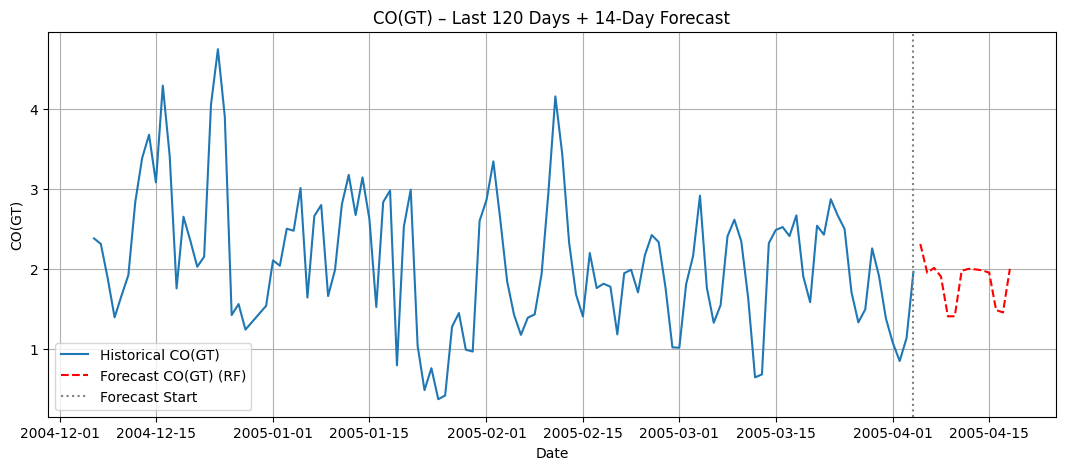

In [200]:
#history and future trend
#CO(GT)
plt.figure(figsize=(13,5))
plt.plot(df_daily.index[-120:], df_daily['CO(GT)'].iloc[-120:], label='Historical CO(GT)')
plt.plot(future_dates, future_co_pred_rf, label='Forecast CO(GT) (RF)', linestyle='--', color='red')
plt.axvline(x=last_date, color='gray', linestyle=':', label='Forecast Start')
plt.title('CO(GT) – Last 120 Days + 14‑Day Forecast')
plt.xlabel('Date')
plt.ylabel('CO(GT)')
plt.legend()
plt.grid(True)
plt.show()

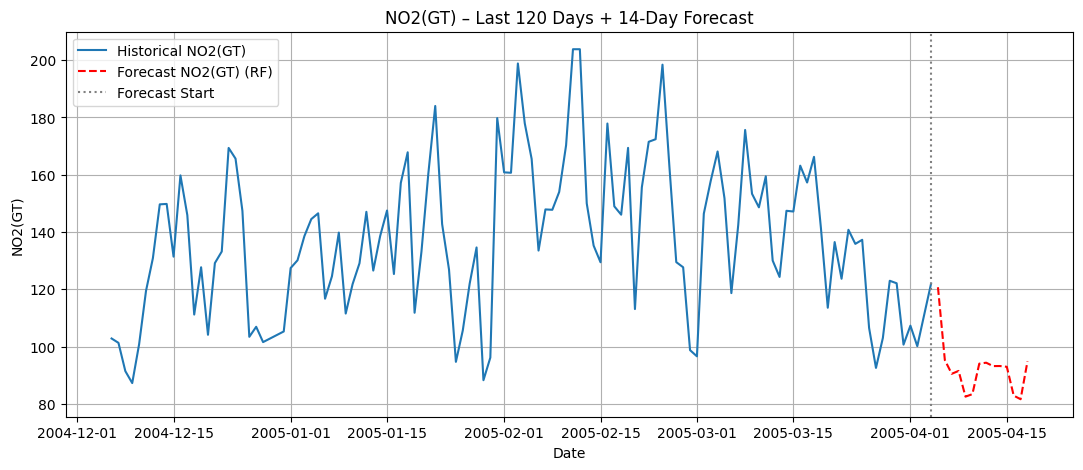

In [202]:
#history and future trend
#NO2(GT)
plt.figure(figsize=(13,5))
plt.plot(df_daily.index[-120:], df_daily['NO2(GT)'].iloc[-120:], label='Historical NO2(GT)')
plt.plot(future_dates, future_no2_pred_rf, label='Forecast NO2(GT) (RF)', linestyle='--', color='red')
plt.axvline(x=last_date, color='gray', linestyle=':', label='Forecast Start')
plt.title('NO2(GT) – Last 120 Days + 14‑Day Forecast')
plt.xlabel('Date')
plt.ylabel('NO2(GT)')
plt.legend()
plt.grid(True)
plt.show()

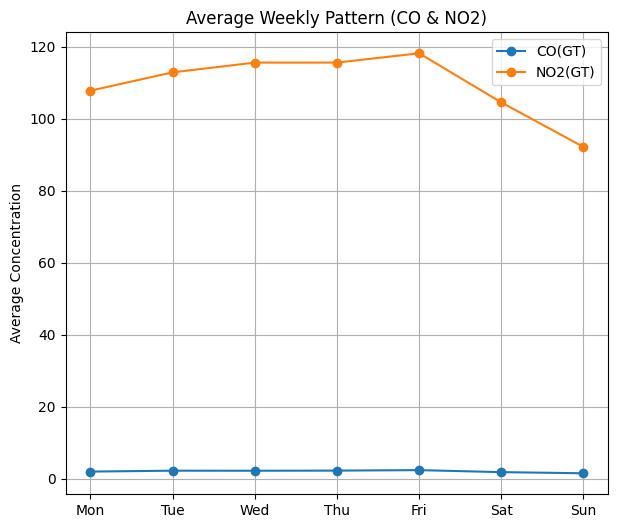

In [207]:
#Highlight seasonal patterns, peak times, and periods of concern
#Weekly average pattern
weekly_pattern = df_daily[['CO(GT)', 'NO2(GT)']].groupby(df_daily.index.dayofweek).mean()
weekly_pattern.index = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

plt.figure(figsize=(7,6))
plt.plot(weekly_pattern.index, weekly_pattern['CO(GT)'], marker='o', label='CO(GT)')
plt.plot(weekly_pattern.index, weekly_pattern['NO2(GT)'], marker='o', label='NO2(GT)')
plt.title('Average Weekly Pattern (CO & NO2)')
plt.ylabel('Average Concentration')
plt.grid(True)
plt.legend()
plt.show()

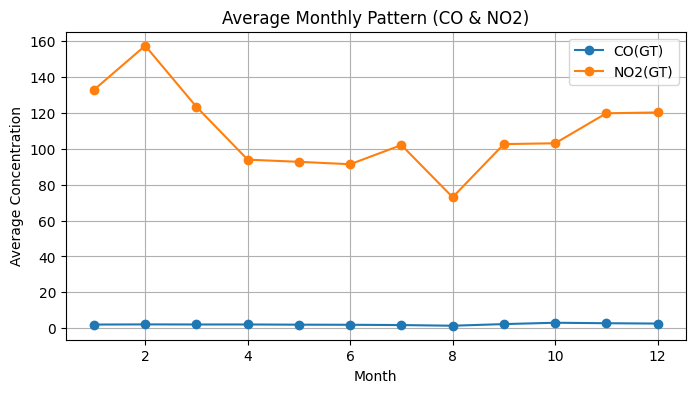

In [208]:
#Highlight seasonal patterns, peak times, and periods of concern
#Monthly average pattern
monthly_pattern = df_daily[['CO(GT)', 'NO2(GT)']].groupby(df_daily.index.month).mean()

plt.figure(figsize=(8,4))
plt.plot(monthly_pattern.index, monthly_pattern['CO(GT)'], marker='o', label='CO(GT)')
plt.plot(monthly_pattern.index, monthly_pattern['NO2(GT)'], marker='o', label='NO2(GT)')
plt.title('Average Monthly Pattern (CO & NO2)')
plt.xlabel('Month')
plt.ylabel('Average Concentration')
plt.grid(True)
plt.legend()
plt.show()

In [210]:
#Identify simple peak days based on history
co_threshold = df_daily['CO(GT)'].quantile(0.9)
no2_threshold = df_daily['NO2(GT)'].quantile(0.9)

peak_days_co = df_daily[df_daily['CO(GT)'] > co_threshold]
peak_days_no2 = df_daily[df_daily['NO2(GT)'] > no2_threshold]

print("High‑risk CO(GT) historical days (top ~10%):", len(peak_days_co))
print("High‑risk NO2(GT) historical days (top ~10%):", len(peak_days_no2))

High‑risk CO(GT) historical days (top ~10%): 39
High‑risk NO2(GT) historical days (top ~10%): 39


In [219]:
#actionable recommendations


print("\n INSIGHTS & RECOMMENDATIONS...")

#Weekly / weekend pattern
co_weekend_mean = weekly_pattern.loc[['Sat', 'Sun'], 'CO(GT)'].mean()
co_weekday_mean = weekly_pattern.loc[['Mon', 'Tue', 'Wed', 'Thu', 'Fri'], 'CO(GT)'].mean()
no2_weekend_mean = weekly_pattern.loc[['Sat', 'Sun'], 'NO2(GT)'].mean()
no2_weekday_mean = weekly_pattern.loc[['Mon', 'Tue', 'Wed', 'Thu', 'Fri'], 'NO2(GT)'].mean()

if co_weekend_mean > co_weekday_mean:
    print("- CO levels are relatively higher on weekends, so traffic and industrial emission control should be stricter on weekends (odd-even car policy, restricting heavy vehicles, etc.).")
else:
    print("- CO levels are higher on weekdays, so recommendations include better rush-hour traffic management and promoting public transport.")

if no2_weekend_mean > no2_weekday_mean:
    print("- NO2 tends to be higher on weekends, so focus should be on controlling domestic fuel use and localized emissions.")
else:
    print("- NO2 tends to be higher on weekdays, so emission monitoring in office and industrial areas should be strengthened.")

#If forecasted days cross high-risk thresholds
future_co_high = np.sum(future_co_pred_rf > co_threshold)
future_no2_high = np.sum(future_no2_pred_rf > no2_threshold)

print(f"- In the next {future_horizon} days, the forecast suggests CO will cross the high-risk threshold on about {future_co_high} days.")
print(f"- In the next {future_horizon} days, the forecast suggests NO2 will cross the high-risk threshold on about {future_no2_high} days.")

print("- On these high-risk days, vulnerable groups (children, the elderly, and people with asthma/COPD) should limit outdoor exposure, use masks, and improve indoor ventilation as part of public health advice.")
print("- Around traffic hotspots and industrial belts, stricter monitoring and real-time data–driven measures (speed limits, entry restrictions, temporary diversions) should be applied.")



 INSIGHTS & RECOMMENDATIONS...
- CO levels are higher on weekdays, so recommendations include better rush-hour traffic management and promoting public transport.
- NO2 tends to be higher on weekdays, so emission monitoring in office and industrial areas should be strengthened.
- In the next 14 days, the forecast suggests CO will cross the high-risk threshold on about 0 days.
- In the next 14 days, the forecast suggests NO2 will cross the high-risk threshold on about 0 days.
- On these high-risk days, vulnerable groups (children, the elderly, and people with asthma/COPD) should limit outdoor exposure, use masks, and improve indoor ventilation as part of public health advice.
- Around traffic hotspots and industrial belts, stricter monitoring and real-time data–driven measures (speed limits, entry restrictions, temporary diversions) should be applied.
